## Background 

While electric vehicles are attractive from the standpoint of their low carbon footprint, there is concern that EV charging could potentially destabilize the electrical grid in the future. The argument is that if EV owners simply opt to charge their vehicle when they arrive home from work in the evening, then peak demand could be very sharply increased. Since it has been suggested that EV charging could potentially increase a household’s total electricity consumption by as much as 50%, the increase in peak demand could be much higher.

Peak power demand is often met with simple cycle gas turbines which can be started up within minutes and are relatively inexpensive to purchase and expeditious to install. However, when their electrical output is ramping up and down sharply, their CO2 emissions per kwh can be similar to those of a coal-fired power plant. Accordingly,absent an economic form of power storage, the benefit of carbon-free Renewable energy may be much reduced. While battery storage has been much discussed, the cost been calculated as 25 cents per kwh, which far exceeds the generation cost which is often below 4 cents per kwh for Renewables. For this reason, 98% of the storage implemented to date has been in the form of pumped hydro, with batteries accounting for less than 2%.

An opposing view is that EV charging could actually help stabilize the electrical grid because it can increase power demand at night when it is commonly lowest. In particular, output from wind turbines is often lowest in the “wee hours” (eg from midnight till 4am) , and sometimes power prices are even actually negative then as a result. While negative prices might at first seem a good thing, as a practical matter they invite lobbying for all manner of subsidies so the generator can remain profitable and justify continuing to supply the grid with power.The type of backroom deals that result are usually far from optimal.

## A Data Science Perspective

In general, most EV owners as a matter of actual practice tend to charge their vehicles for about two hours each night, and in one continuous stretch. However, output from wind turbines can vary greatly within the space of just five minutes. This raises the question of whether significant costs savings could be achieved by charging intermittently at times when the power price is lowest (or even negative). For example, a Decision Rule could be adopted to charge for any Five-Minute period if the price was below 2 cents per kwh at the onset of that period. So now, instead of a continuous stretch of two hours (or 24 Five-Minute intervals), we could have 24 Five-Minute intervals chosen within a time from 11pm to 6am when the price happened to be below 2 cents/kwh. Of course, it is not practical for the EV owner to be up all night checking each Five-Minute price. Rather the owner would subscribe to an App that would do this on his behalf. Specifically, the EV owner would cede control of the charging to the App, and in return receive a hopefully significantly lower charging cost.

This of course is the Data Science Question. Is it reasonable to suppose that the distribution of prices is sufficiently dispersed that the opportunity exists to significantly lower the cost through selective, opportunistic charging in the manner outlined above. For example, if nighttime prices did not really vary that much from interval to interval, then the benefit of selective charging would be insufficient to justify the effort and the cost involved of setting up the whole system.

While there are many possible metrics, a simple one (“Metric One”) was someone arbitrarily chosen just to start exploring the data and making a crude preliminary assessment. If this was encouraging, then further more comprehensive analysis would appear to be justified. 

Metric One: what percentage savings are achieved for the wholesale power price at a major grid node by charging at the lowest-price (non-consecutive) 24 periods rather than simply by charging from midnight to 2am? The latter approach has been chosen as a benchmark, as it could easily and inexpensively be implemented with a timer.

Northern California was the subject of the initial analysis because of (a) the state’s focus on Renewable forms of Energy, (b) the interest in electric vehicle ownership, and (c) the availability of power prices at 5 minute intervals (versus the hourly prices available for other grids). The dominant utility is Pacific Gas & Electric (“PGE”), and so the major PGE clearing Node was chosen.

[Metric Two: ] A variation on the above approach is when a so-called Level Two charger is used, which is more expensive than a standard EV charger but charges at twice the rate. Accordinly the above analysis could be repeated, but this time with the prices of the 12 lowest intervals, rather than the 24 lowest.

## Data Collection and Processing

Process: time series data (specifically in Five Minute intervals) for the PGE Node was downloaded in the form of twelve monthly csv files from the California Independent System Operator (“CAISO”), which is based in Sacramento, the state capital. Each file took about seven minutes to download on the weekend, but during weekdays many of the attempted downloads failed. It seems that most interested parties obtain the data from a third-party provider, for which subscriptions are reportedly (according to a leading academic) very expensive. After requisite data cleaning, these monthly files were then merged to make a continuous time series.

## Commentary: 

An Initial Surprise: Plotting this time series revealed quite a surprise. While one can indeed discern low and negative prices, the “shocker” is the recurrent price spikes of around $1.00 per kwh (apparently the statutory maximum), compared to the average price of closer to just 3 cents/kwh. While there has been much discussion of the negative prices (which occur in c.3% of the intervals), I have personally never heard of the prodigious price spikes. To investigate this matter further, separate plots were done for the four months with the highest incidence of such spikes, namely February through May. The spikes seem to be spaced out and non-consecutive, further adding to the mystery. An email dialogue via LinkedIn with a leading Energy Data Analytics company in Northern California confirmed the veracity of the spikes, but no explanation was provided other than their supposedly random nature and that they may be “congestion related”. While these spikes are indeed rare (counting them reveals a frequency of only 1%), they are so large that they still make a large contribution to the mean Node price. This phenomenon, although not the subject of the initial inquiry, clearly needs further investigation.

A Personal Hypothesis: from my somewhat extensive background reading and historical domain knowledge, March is the month with the steepest hourly ramping of fossil fuel production. My guess is that this occurs in March because at the onset of peak demand in the evening there are still relatively few fossil fuel plants running, as the seasonal Air Conditioning demand has not started yet and most of the power is coming from Renewables. So the fossil fuel plants are "cold" and slow to start up (just like a car that has not been driven for a while). One theory to test is whether the rare spikes are positively correlated with a faster ramping rate. One simple chart that might be informative is a scatter-plot of the percentage of the load that is supplied by Renewables in a given week versus the frequency of price spikes in that week.
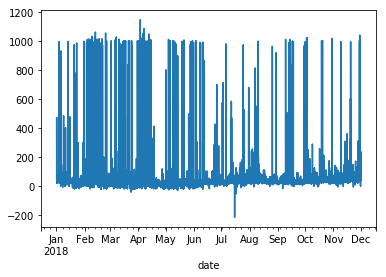


Quantification of Metric One: the crudest initial exploration is to look at the tail of the distribution.

Each day have to first sort to find the lowest-price 24 periods, then compute the average for these periods (again, for each average).


## Conceptual Algorithm
To derive a floor for the daily charging costs associated with the App:
1. Take the concatenated DF and carve out only the hours 1 to 6.
2. Currently this DF is sorted by 'day', then 'hour', then by 'interval'.
3. We want it sorted by 'day','hour', then by 'price' (for the 6 x 12 = 72 intervals)
4. For a two hour charging period of 24 non-consecutive intervals, we clip off the first 24 off the 72 intervals for each day, 
and then compute their mean.
5. This derives the mean of the 24 lowest-price intervals in the subject six-hour period for each day

# Footnote
Personally, the ("publicly undiscussed") price spikes are a much more interesting topic than the negative power prices. Why? Because the negative prices can be made to go away simply with Curtailments. While this does not solve the broader issue of over-abundant supply of Renewable energy (primarily from Solar PV), it does appear as a statistical solution. Secondly, since the Solar and Wind generators often receive valuable tax credits worth more than 2 cents per kwh, for these generators the net price is still positive. Moreover, while the phenomena of negative prices has attracted a great deal of discussion, we can easily calculate that they effect the overall average price only modestly. In stark contrast, if the huge Price spikes should increase in frequency from 1% to 4%, average power prices could more than double! My economic intuition therfore suggests that the most valuable problem to understand and to solve is that of the still mysterious and largely undiscussed price spikes, which might ultimately threaten the viability of the Renewables paradigm.

## A Second Surprise:

The wholesale prices for the year were grouped by their respective hour of the day, and then averaged. The surprise was that the lowest prices did NOT occur in the middle of the night as PG&E’s published materials had suggested, but rather in the middle of the day - in the hours surrounding solar noon. In short, in recent years PV solar generation (including from rooftop solar panels) has become so abundant that it may at times even exceed the total power demand (known as the Load). Another reported factor is hydroelectric power. Apparently much of this is from flowing streams rather than dams, and for these streams the power can not be managed in the way that it can be with dams.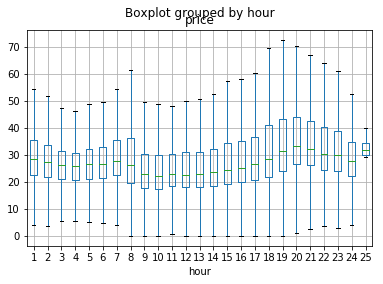



## Preliminary Conclusion
Interestingly the above chart provides a strong hint as to our likely conclusion. Specifically, it shows the interquartile ranges as well as the medians. So we can see that the median price is around 28 dollars per MWh for hours 1 & 2, corresponding to the first two hours (so from midnight). But we can see that for the hours Three, Four, and Five, about 25 percent of the observations are below $20/MWh, and the mean of these observations may be around $15/MWh. 

So a first guess is that we might realise an almost 50 percent reduction in the wholesale cost (the 15 dollar mean for the observations below the interquartile range, versus the above cited median for the first two hours of $28/MWh. This is encouraging, and suggests that the additional effort to investigate matters in a much more rigorous manner may not be wasted.

In [1]:
import os
print(os.getcwd())

C:\Users\DWWillson\Desktop\CAISO Monthly Prices


In [2]:
import pandas as pd
df= pd.read_csv('October_2018.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44640 entries, 0 to 44639
Data columns (total 16 columns):
INTERVALSTARTTIME_GMT    44640 non-null object
INTERVALENDTIME_GMT      44640 non-null object
OPR_DT                   44640 non-null object
OPR_HR                   44640 non-null int64
NODE_ID_XML              44640 non-null object
NODE_ID                  44640 non-null object
NODE                     44640 non-null object
MARKET_RUN_ID            44640 non-null object
LMP_TYPE                 44640 non-null object
XML_DATA_ITEM            44640 non-null object
PNODE_RESMRID            44640 non-null object
GRP_TYPE                 44640 non-null object
POS                      44640 non-null int64
VALUE                    44640 non-null float64
OPR_INTERVAL             44640 non-null int64
GROUP                    44640 non-null int64
dtypes: float64(1), int64(4), object(11)
memory usage: 5.4+ MB


In [4]:
df.head()

,INTERVALSTARTTIME_GMT,INTERVALENDTIME_GMT,OPR_DT,OPR_HR,NODE_ID_XML,NODE_ID,NODE,MARKET_RUN_ID,LMP_TYPE,XML_DATA_ITEM,PNODE_RESMRID,GRP_TYPE,POS,VALUE,OPR_INTERVAL,GROUP
0,2018-10-01T07:00:00-00:00,2018-10-01T07:05:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,1,1
1,2018-10-01T07:05:00-00:00,2018-10-01T07:10:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,2,1
2,2018-10-01T07:10:00-00:00,2018-10-01T07:15:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,3,1
3,2018-10-01T07:15:00-00:00,2018-10-01T07:20:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,4,1
4,2018-10-01T07:20:00-00:00,2018-10-01T07:25:00-00:00,10/1/2018,1,TH_NP15_GEN-APND,TH_NP15_GEN-APND,TH_NP15_GEN-APND,RTM,MCC,LMP_CONG_PRC,TH_NP15_GEN-APND,ALL_APNODES,0,0.0,5,1


In [23]:
# Since files are iterable, we can attempt a list comprehension which eliminates repetitive typing
files= ['January_2018.csv','February_2018.csv', 'March_2018.csv' ] # test first on just three files
dfs= [pd.read_csv(file, header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT') for file in files]
dfc= pd.concat(dfs)
dfc.info() # this appears to work!!

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129540 entries, 2018-01-01 08:00:00 to 2018-04-01 06:55:00
Data columns (total 6 columns):
OPR_DT           129540 non-null object
OPR_HR           129540 non-null int64
LMP_TYPE         129540 non-null object
XML_DATA_ITEM    129540 non-null object
VALUE            129540 non-null float64
OPR_INTERVAL     129540 non-null int64
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


df_Jan= pd.read_csv('January_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [6]:
df_Feb= pd.read_csv('February_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [7]:
df_Mar= pd.read_csv('March_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [8]:
df_Apr= pd.read_csv('April_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [9]:
df_May= pd.read_csv('May_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [10]:
df_Jun= pd.read_csv('June_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [11]:
df_Jul= pd.read_csv('July_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [12]:
df_Aug= pd.read_csv('August_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [13]:
df_Sep= pd.read_csv('September_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [14]:
df_Oct= pd.read_csv('October_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')


In [15]:
df_Nov= pd.read_csv('November_2018.csv', header= 0, usecols= [0,2,3,8,9,13,14],parse_dates= True, index_col= 'INTERVALSTARTTIME_GMT')

In [ ]:
frames= [df_Jan,df_Feb,df_Mar, df_Apr, df_May, df_Jun, df_Jul,df_Aug, df_Sep, df_Oct, df_Nov]
df1= pd.concat(frames)

In [17]:
dfp= df1[df1['LMP_TYPE'] == 'LMP'] # drops the other four price components and reduces data rows by 80%

In [18]:
dfp['date']= pd.to_datetime(dfp['OPR_DT']) #needed for plotting after the groupby

C:\Users\DWWillson\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
dfp.info() # as desired, the date is now the DateTime object (perfect for time series plotting)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96192 entries, 2018-01-01 08:00:00 to 2018-12-01 07:55:00
Data columns (total 5 columns):
hour        96192 non-null int64
price       96192 non-null float64
interval    96192 non-null int64
day         96192 non-null datetime64[ns]
weekday     96192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.4+ MB


In [25]:
dfp= dfp.drop(['OPR_DT','LMP_TYPE','XML_DATA_ITEM'],axis=1)
dfp.columns= ['hour','price','interval','day']
dfp['weekday']= dfp.day.dt.weekday_name
dfp.index.names= ['date']

dfp.head()
# This is sorted by datetime index.We want to first carve out hours 1 to 6 (hour 6 ends at 7am)
# then carve out hours 1 & 2 only and calculate mean price for each day via groupby(day)
# then sort by day and price 

KeyError: "['OPR_DT' 'LMP_TYPE' 'XML_DATA_ITEM'] not found in axis"

In [41]:
dfp.info()
dfp.shape

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96192 entries, 2018-01-01 08:00:00 to 2018-12-01 07:55:00
Data columns (total 5 columns):
hour        96192 non-null int64
price       96192 non-null float64
interval    96192 non-null int64
day         96192 non-null datetime64[ns]
weekday     96192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 6.9+ MB


(96192, 5)

In [ ]:
type(dfp['hour'] in list(range(1,7)))  # try df = df[df['date'].isin(a)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [47]:
dfw= dfp[(dfp['hour'].isin([1,2,3,4,5,6]))] # This generates the DF for the "wee hours" from midnight to 7am
dfw.head()
# dfw.shape # so we are down to just the six wee hours

,hour,price,interval,day,weekday
date,,,,,
2018-01-01 08:00:00,1,38.89844,1,2018-01-01,Monday
2018-01-01 08:05:00,1,53.66772,2,2018-01-01,Monday
2018-01-01 08:10:00,1,53.66772,3,2018-01-01,Monday
2018-01-01 08:15:00,1,53.57858,4,2018-01-01,Monday
2018-01-01 08:20:00,1,53.90588,5,2018-01-01,Monday


In [53]:
dfw= dfw.sort_values(['day','price'], ascending=[True, True])
dfw.head(75)
# dfw.tail(3)
# Hmm add a new column that repeats itself from Range(24) (via broadcasting?) and then filter on that 
dfw['counter']= range(72)*(len(dfw)/72)
dfw.head()

TypeError: unsupported operand type(s) for *: 'range' and 'float'

In [55]:
len(dfw)/72

333.8333333333333

In [57]:
from itertools import cycle

pattern = cycle(list(range(24))
dfw['counter'] = [next(item) for item in range(len(df)]

SyntaxError: invalid syntax (<ipython-input-57-b5088bf08571>, line 3)

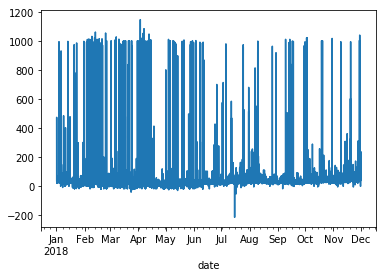

In [53]:
# import matplotlib.pyplot as plt # shocking grid instability due to price peaks 
dfp['price'].plot()
# plt.show()

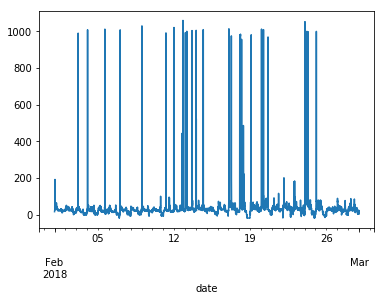

In [54]:
Feb= dfp.loc['2018-02-01':'2018-02-28'] # if a peak of $1000/MWh occurs only 1%, it still adds $10/MWh to the mean!!!*****
Feb['price'].plot()
# So what is causing the spikes!! $10/MWh versus average of 25:mostly only for 3 months Feb, March, April (but 1% is for the YEAR)
# Easy to quantify frequency by month (could it be unexpected drops in Wind not reflected in Day-Ahead-Market ??)
# while the negative prices are more frequent at 3%, the value is maybe $20/MWh so contribution to the mean is only 
# Review "State of the Market" report by Potomac (ask them this!!)

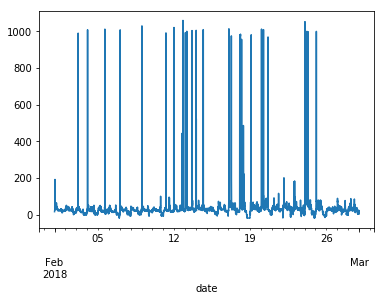

In [55]:
Mar= dfp.loc['2018-03-01':'2018-03-31'] # so a peak of $140/MWh is 14 cents
Mar['price'].plot()
        

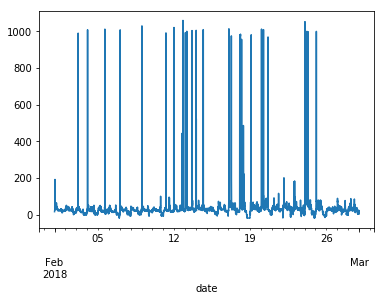

In [56]:
April= dfp.loc['2018-04-01':'2018-04-30'] # so a peak of $140/MWh is 14 cents
April['price'].plot()

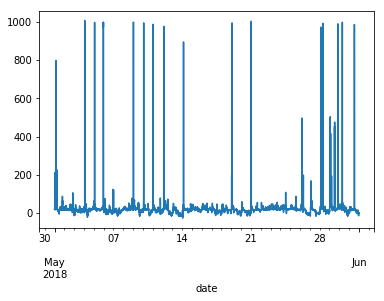

In [58]:
May= dfp.loc['2018-05-01':'2018-05-31'] # so a peak of $140/MWh is 14 cents
May['price'].plot()

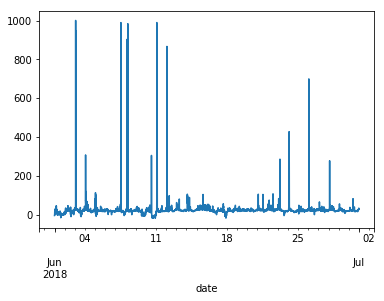

In [59]:
June= dfp.loc['2018-06-01':'2018-06-30'] # so a peak of $140/MWh is 14 cents
June['price'].plot()

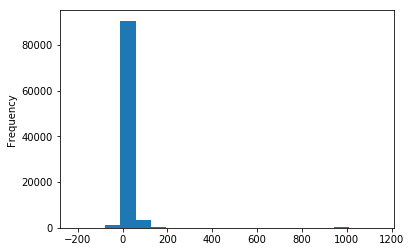

In [61]:
dfp.price.plot(kind='hist', bins=20) # the outliers at 1000 (50x the normal price) spoil the display


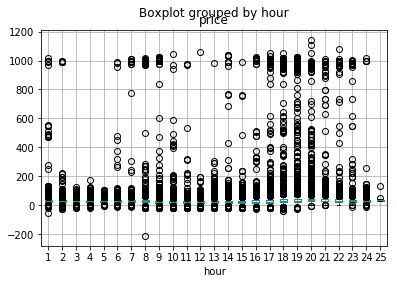

In [63]:
dfp.boxplot(column= 'price', by= 'hour')


In [64]:
dfp.columns
dfp.shape

(96192, 5)

In [76]:
spikep= dfp[dfp.price > 100]  # so we have 1.2% frequency of spike prices, although optically they dominate the plots!
spikep.shape

(1181, 5)

In [77]:
normalp= dfp[(dfp.price < 100) & (dfp.price > 0)] # 
normalp.shape

(90749, 5)

In [99]:
negativep= dfp[(dfp.price < 0) & (dfp.price > -30)] # so almost 3% of the time we have a negative price or zero
negativep.shape   # and just four times we have prices more negative than 50

(2830, 5)

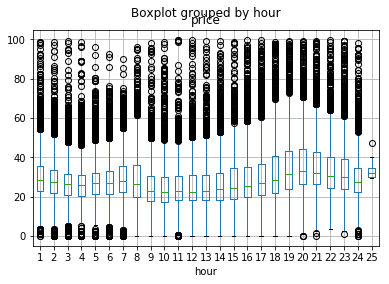

In [100]:
normalp.boxplot(column= 'price', by= 'hour')  # below uses showfliers=False to exclude the outliers being displayed


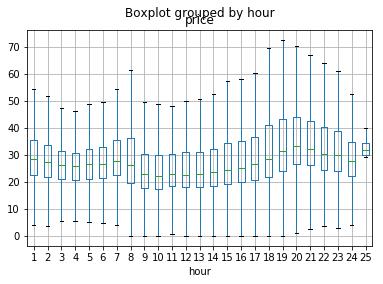

In [101]:
normalp.boxplot(column= 'price', by= 'hour',showfliers=False)  # showfliers=False


In [102]:
g= normalp.groupby('hour')
g.count()

# This seems to be saying that the three hours in November with the most frequent low prices are from 10am to 3pm
# But these 172 five-minute intervals average only 29 minutes a day of prices below $20/MWh
# Level 1 charger is normally 2 hours of charging: MAY NEED TO INCREASE THRESHOLD TO 3 CENTS/$30/MWh
# BIG QUESTION IS WHETHER THE DIFFERENCE FOR PEAK EVENING PRICES EXCEEDS 25 CENTS/KWH, OF $45/MWh (see p.17 of "Charging Smart")
# Counts can be compared to 30 days x 12 Intervals = 360 Intervals/month

,price,interval,day,weekday
hour,,,,
1,3955,3955,3955,3955
2,3946,3946,3946,3946
3,3957,3957,3957,3957
4,3967,3967,3967,3967
5,4002,4002,4002,4002
6,3984,3984,3984,3984
7,3965,3965,3965,3965
8,3791,3791,3791,3791
9,3590,3590,3590,3590


In [103]:
normalp.groupby('hour').mean()
# The lowest average prices are from 9am to 4pm, which is when Solar is strongest.

,price,interval
hour,,
1,30.228130,6.506953
2,28.826204,6.505575
3,27.460348,6.504170
4,27.262570,6.497857
5,28.039245,6.506747
6,28.265374,6.494729
7,30.031032,6.482219
8,28.869258,6.420733
9,25.219305,6.413092


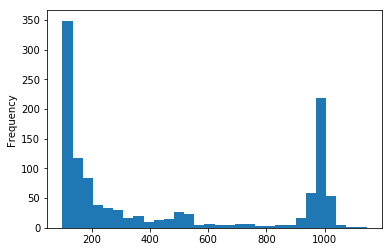

In [104]:
spikep.price.plot(kind='hist', bins=30)

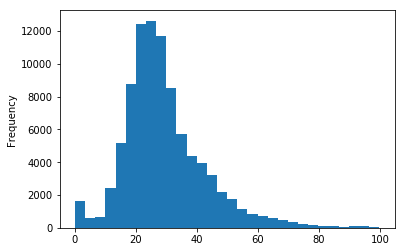

In [105]:
normalp.price.plot(kind='hist', bins=30)  # No showfliers= False !!

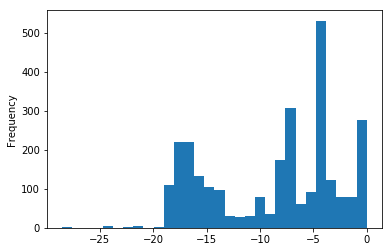

In [106]:
negativep.price.plot(kind='hist', bins=30) # excludes two outliers below -50 and an additional two below -30

WHAT IS THE QUESTION: NEED TO LIMIT HOURS TO PGE NIGHT RANGE AND COMPARE 24 INTERVALS VS 12! COMPARE PRICE DELTA

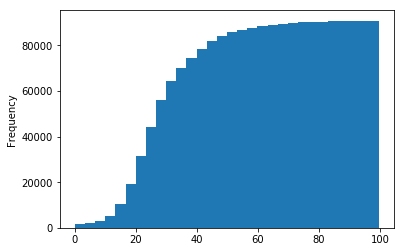

In [109]:
normalp.price.plot(kind='hist', bins=30, cumulative= True)
# Two hours per day average for a Level One EV charger is 24 intervals x 30 days = 720: THRESHOLD must be increased!!!
# Add a horizontal red line at 720 !!
# Define a function that computes the average price (eg still below 2 cents?)

In [110]:
# this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
def peak(hour): 
    if hour in [24,1,2,3,4,5,6,7]:
        return 'OP'
    elif hour in [15,16,17,18,19,20,21,22]:
        return 'P'
    else:
        return 'S'
    
    

COMPREHENSIVE APPROACH TO PG&E PUBLISHED SCHEDULE
if date is a public holiday (saved as a list for 2018) OR day is weekend (Saturday/Sunday) then Peak is 3-7pm (rest Off Peak)
if day is a weekday (and not a holiday) then:
Peak is 2-9pm (hours 14 to 21)...list(range(14,22)
Partial Peak is 7am to 2pm and 9-11pm: hours 7-14 & 21-23: hour in list(range(7,15)) + list(range(21,24))
Otherwise (ELSE) 'OP' which is Off-Peak

In [138]:
# need to enter dates as strings and make the dates datetime objects with  .to_datetime() method in pandas so Boolean is OK
holidays = ['2018-01-01','2018-01-15','2018-02-19','2018-05-28','2018-07-04','2018-09-03','2018-12-25'] #list of public holidays
holidays= pd.to_datetime(holidays) 
holidays # this works OK it seems so the Boolean should match

DatetimeIndex(['2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-12-25'],
              dtype='datetime64[ns]', freq=None)

In [155]:
# indentation is likely a problem as I mixed tabs and spaces!! Paste this into Spyder to debug? NOT SO! now runs!
# NB at 7am the 7th hour has just concluded, so 'PP' begins with the 8th hour
def PGE(hour,day,weekday): # hour, day, and weekday are columns from the dfp dataframe above (types listed 3 cells below)
    # need to enter dates as strings and make the dates datetime objects with  .to_datetime() method in pandas (works OK above)
    holidays = ['2018-01-01','2018-01-15','2018-02-19','2018-05-28','2018-07-04','2018-09-03','2018-12-25']
    holidays= pd.to_datetime(holidays)
    # list of public holiday
    weekend_peak= list(range(16,20)) # weekend peak is 3-7pm: noon begins hour 13, so 2pm is hour 15, 3pm is hour 16
    weekday_peak= list(range(15,23)) # this corresponds to the weekdays Monday to Friday, first for 2-9pm, for hours 15 to 8
    partial_peak= list(range(8,15)) + list(range(22,24))
    off_peak= list(range(1,8)) + [24] 
    if (day in holidays)|(weekday in ['Saturday','Sunday']):
      if hour in weekend_peak: 
        return 'P'
      else:   
        return 'OP'  
    elif hour in weekday_peak: 
      return'P'   
    elif hour in partial_peak: 
      return 'PP'  
    elif hour in off_peak:
      return 'OP'
    else:
      return 'problem!' 
      # we should never see this condition triggered unless there is a problem (hour 25 when clocks set back!)
# as a sanity check the respective lists added together should equal list(range(1,25)) so we should test with this Boolean!!
PGE(16,holidays[0],'Tuesday')

'P'

In [ ]:
list(range(1,8)) + [24]

In [156]:
PGE(14, holidays[0], 'Monday')

'OP'

In [147]:
combined= list(range(15,23)) + list(range(8,15)) + list(range(22,24)) + list(range(1,8)) + [24] 
sorted(combined) # == list(range(1,25)) #  False!!  PROBLEM (Hmm: they match but combined is NOT horizontal but vertical!!)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 22,
 23,
 24]

In [144]:
list(range(15,22)) + list(range(8,15)) + list(range(22,24)) + list(range(1,8)) + [24] #22

[15,
 16,
 17,
 18,
 19,
 20,
 21,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 22,
 23,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 24]

In [136]:
list(range(7,14)) + list(range(21,22)) # test for Partial Peak ('PP')                    

[7, 8, 9, 10, 11, 12, 13, 21]

In [134]:
list(range(14,21)) # test for Peak ('PP')

[14, 15, 16, 17, 18, 19, 20]

In [140]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96192 entries, 2018-01-01 08:00:00 to 2018-12-01 07:55:00
Data columns (total 6 columns):
hour        96192 non-null int64
price       96192 non-null float64
interval    96192 non-null int64
day         96192 non-null datetime64[ns]
weekday     96192 non-null object
PGE         96192 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 7.6+ MB


In [ ]:
this function returns PG&E's designation of Peak (P), Off-Peak (OP), or Standard (S) EV pricing according to the hour of day
#def peak(hour): 
    if hour in [list(range(1,8) + [24]]:
       return 'OP'
   elif hour in [list(range(15,23)]:
        return 'P'
    else:
        return 'S'
   
# list comprehension version? see below

In [ ]:
d= {'OP':list(range(1,8))+ [24], 'P':list(range(15,23)),'S':list(range(8,15)) + list(range(22,24))}
def PGE(hour):
    for key,value in d.items:
        if hour in d.value  #FIX THIS
            return d.key
print(PGE(3))

In [113]:
peak(1)
peak(16)

'P'

In [114]:
dfp['PGE']= dfp.hour.apply(peak)
dfp.PGE.head()
dfp.PGE.tail()

date
2018-12-01 07:35:00    OP
2018-12-01 07:40:00    OP
2018-12-01 07:45:00    OP
2018-12-01 07:50:00    OP
2018-12-01 07:55:00    OP
Name: PGE, dtype: object

In [115]:
dfp.head()

,hour,price,interval,day,weekday,PGE
date,,,,,,
2018-01-01 08:00:00,1,38.89844,1,2018-01-01,Monday,OP
2018-01-01 08:05:00,1,53.66772,2,2018-01-01,Monday,OP
2018-01-01 08:10:00,1,53.66772,3,2018-01-01,Monday,OP
2018-01-01 08:15:00,1,53.57858,4,2018-01-01,Monday,OP
2018-01-01 08:20:00,1,53.90588,5,2018-01-01,Monday,OP


In [118]:
gPGE= dfp.groupby(['day','PGE'])

In [119]:
daily_PGE= gPGE.price.mean() # this is hourly data!!
daily_PGE.head(20)

day         PGE
2018-01-01  OP      45.550035
            P       34.851425
            S       25.211496
2018-01-02  OP      28.872308
            P       37.802679
            S       33.654966
2018-01-03  OP      39.579661
            P       48.640385
            S      105.711009
2018-01-04  OP      38.596313
            P       40.072295
            S       30.575908
2018-01-05  OP      28.938773
            P       83.648815
            S       21.137134
2018-01-06  OP      28.414740
            P       24.685236
            S       23.161737
2018-01-07  OP      27.611663
            P       37.727019
Name: price, dtype: float64

In [121]:
dfPGE= daily_PGE.to_frame()
dfPGE= dfPGE.sort_values(['day'])
dfPGE.head()

price
day        PGE           
2018-01-01 OP   45.550035
           P    34.851425
           S    25.211496
2018-01-02 OP   28.872308
           P    37.802679

In [122]:
dfPGE.tail() # 

price
day        PGE            
2018-11-29 OP    50.851328
           S    193.772413
2018-11-30 P     71.013740
           OP    62.724867
           S     45.236383

In [123]:
dfPGE= dfPGE.unstack('PGE')
dfPGE.head()

price                       
PGE                OP          P           S
day                                         
2018-01-01  45.550035  34.851425   25.211496
2018-01-02  28.872308  37.802679   33.654966
2018-01-03  39.579661  48.640385  105.711009
2018-01-04  38.596313  40.072295   30.575908
2018-01-05  28.938773  83.648815   21.137134

[]

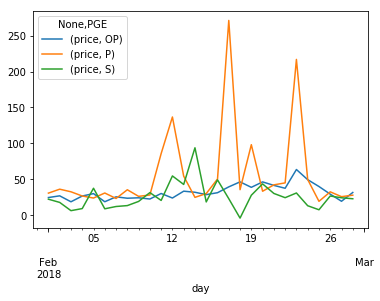

In [124]:
FebPGE = dfPGE.loc['2018-02-01':'2018-02-28'].plot()# so a peak of $140/MWh is 14 cents
FebPGE.plot()

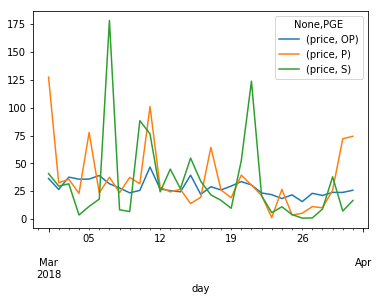

In [125]:
MarPGE = dfPGE.loc['2018-03-01':'2018-03-31'] # so a peak of $140/MWh is 14 cents
MarPGE.plot()

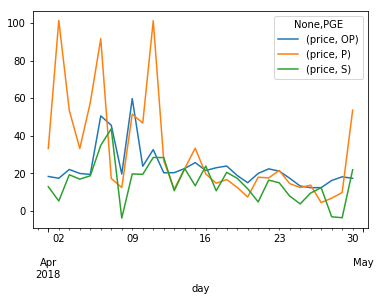

In [127]:
AprPGE= dfPGE.loc['2018-04-01':'2018-04-30'] # so a peak of $140/MWh is 14 cents
AprPGE.plot()

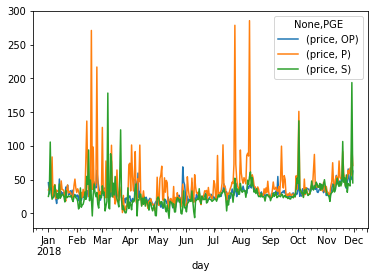

In [128]:
dfPGE.plot() 
# THIS IS A CRITICAL PLOT TO BE REPEATED MONTHLY USING A PANEL APPROACH (can use df.loc() or extract 'month' as a variable)
# Surprises: the highest spikes are not Peak but Standard, 
# peak is evening from 2pm to 8pm!
# Peak seems to have recurring spikes perhaps related to the day of the week?
# on many days the standard price is below the off-peak price Can calculate frequency with a Boolean!
# Standard is from 8 until 2pm so prices are lowered by midday solar

In [57]:
dfPGE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 2018-01-01 to 2018-11-30
Data columns (total 3 columns):
(price, OP)    334 non-null float64
(price, P)     334 non-null float64
(price, S)     334 non-null float64
dtypes: float64(3)
memory usage: 10.4 KB


In [58]:
dfPGE.columns= ['OP','P','S']
dfPGE.head(3)
dfPGE.tail()

,OP,P,S
date,,,
2018-11-26,51.455426,58.835906,42.743207
2018-11-27,45.992130,67.155858,40.713603
2018-11-28,53.666140,56.438910,64.134758
2018-11-29,50.851328,99.743466,193.772413
2018-11-30,62.724867,71.013740,45.236383


In [ ]:
# BIG QUESTION: EACH DAY FIND THE HIGHEST 100 PRICES AND THEN THE LOWEST 100 PRICES VIA SORT. 
# THEN SUBTRACT THE LOWEST FROM THE HIGHEST, AND SEE IF > $0.25. KEEP GOING UNTIL THIS THRESHOLD IS HIT! 
# SO CHARGE AT WORK FROM 9 TO 10AM AND USE AT HOME TO RUN AC IN PEAK HOURS!!!

In [ ]:
# We need suppose 2 hours on average daily, 24 intervals/day, 720/month. Find for cumulative of 720 the cut-off price
# Then calculate the average price (of course less than cutoff): compute for 720 vs 360, and annnualise cost benefit
# this is the economic value of the Level 2 Charger versus the Level 1.

In [ ]:
# downsample the 5-minute prices to hourly and match up with hourly wind and solar data (Dhavide Course One)